# 📊 Gestión de Riesgo de Mercado - Implementación Completa

## Cálculo de Volatilidad

### Volatilidad de Activo Individual

In [2]:
import numpy as np
import pandas as pd

# Configuración de simulación
np.random.seed(42)

# 3 años de retornos diarios (año bursátil típico = 252 días)
days = 252 * 3  
returns = np.random.normal(0, 0.01, days)
returns_series = pd.Series(returns, name='RETORNS_DIARIOS')

# Cálculo de volatilidad anualizada
volatility = returns_series.std() * np.sqrt(252)
print(f'📊 Volatilidad anualizada: {volatility:.2%}')

📊 Volatilidad anualizada: 15.69%


### Volatilidad de Cartera Multi-Activo

In [58]:
import numpy as np
import pandas as pd

# Configuración de simulación
np.random.seed(42)

# Simulación de cartera para 3 años de retornos diarios (año bursátil típico = 252 días)
days = 252 * 3  
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, 
                         columns=[f'Asset_{i+1}' for i in range(num_assets)])

# Configuración de cartera equiponderada
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Pesos iguales

# Matriz de varianza-covarianza
cov_matrix = returns_df.cov() 

# Cálculo de volatilidad de cartera: σ_p = √(w^T Σ w)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))
portfolio_volatility_annualized = portfolio_volatility * np.sqrt(252)

print(f'📈 Volatilidad anual de la cartera: {portfolio_volatility_annualized:.2%}')

📈 Volatilidad anual de la cartera: 7.84%


### 2.3 EWMA Activo Individual

In [11]:
import numpy as np
import pandas as pd
    
# Simulación de cartera para 3 años de retornos diarios (año bursátil típico = 252 días)
np.random.seed(42)
days = 252 * 3  
returns = np.random.normal(0, 0.01, days)
returns_df = pd.DataFrame(
    {
        'FECHA': pd.date_range(start='2020-01-01', periods=days, freq='B'),
        'RETORNS_DIARIOS': returns
    }
)
# Parámetro de decaimiento
lambda_ = 0.94

# Selección de datos hasta el penúltimo día
date = returns_df.sort_values(by='FECHA', ascending=True)['FECHA'].iloc[-2]
returns_date = returns_df[returns_df['FECHA'] <= date]

# varianza inicial
var_0 = returns_date['RETORNS_DIARIOS'].var()

# retorno inicial
ret_0 = returns_date['RETORNS_DIARIOS'].iloc[-1]

# Cálculo de volatilidad EWMA
ewma_var = lambda_ * var_0 + (1 - lambda_) * ret_0**2
ewma_vol_annualized = np.sqrt(ewma_var) * np.sqrt(252)

print(f'📉 Volatilidad anualizada EWMA: {ewma_vol_annualized:.2%}')

📉 Volatilidad anualizada EWMA: 15.59%


### EWMA Cartera Multi-Activo

In [12]:
import numpy as np
import pandas as pd

# Simulación de cartera para 3 años de retornos diarios (año bursátil típico = 252 días)
np.random.seed(42)
days = 252 * 3
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, 
                         columns=[f'Asset_{i+1}' for i in range(num_assets)])
returns_df['FECHA'] = pd.date_range(start='2020-01-01', periods=days, freq='B') 

# Parámetro de decaimiento
lambda_ = 0.94

# Selección de datos hasta el penúltimo día
date = returns_df.sort_values(by='FECHA', ascending=True)['FECHA'].iloc[-2]
returns_date = returns_df[returns_df['FECHA'] <= date].drop(columns=['FECHA'])

# Matriz de covarianza inicial
cov_0 = returns_date.cov().values

# Vector de retornos del último día
ret_0 = returns_date.iloc[-1].values.reshape(-1, 1)

# Cálculo de matriz de covarianza EWMA
ewma_cov = lambda_ * cov_0 + (1 - lambda_) * (ret_0 @ ret_0.T)

# Pesos de la cartera (equiponderada)
weights = np.array([0.25, 0.25, 0.25, 0.25]) 

# Cálculo de volatilidad de cartera EWMA
ewma_portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(ewma_cov, weights)))
ewma_portfolio_vol_annualized = ewma_portfolio_vol * np.sqrt(252)

print(f'📉 Volatilidad anualizada EWMA de la cartera: {ewma_portfolio_vol_annualized:.2%}')

📉 Volatilidad anualizada EWMA de la cartera: 8.66%


## VaR Paramétrico

### VaR Paramétrico Activo Individual

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Configuración de simulación
np.random.seed(42)

# 3 años de retornos diarios (año bursátil típico = 252 días)
days = 252 * 3  
returns = np.random.normal(0, 0.01, days)
returns_series = pd.Series(returns, name='RETORNS_DIARIOS')

# Cálculo de VaR paramétrico al 95%
confidence_level = 0.95
mean_return = returns_series.mean()
volatility = returns_series.std()
z_score = norm.ppf(1 - confidence_level)
var_parametric = mean_return + z_score * volatility
var_parametric_monthly = var_parametric * np.sqrt(20)  # Mensualización
print(f'📉 VaR paramétrico al 95%: {var_parametric_monthly:.2%}')

📉 VaR paramétrico al 95%: -7.35%


### VaR Paramétrico Cartera Multi-Activo

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Configuración de simulación
np.random.seed(42)

# Simulación de cartera para 3 años de retornos diarios (año bursátil típico = 252 días)
days = 252 * 3  
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, 
                         columns=[f'Asset_{i+1}' for i in range(num_assets)])

# Configuración de cartera equiponderada
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Pesos iguales

# Matriz de varianza-covarianza
cov_matrix = returns_df.cov() 

# Cálculo de volatilidad de cartera: σ_p = √(w^T Σ w)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))

# Cálculo de VaR paramétrico al 95%
confidence_level = 0.95
mean_return = returns_df.mean().dot(weights)
z_score = norm.ppf(1 - confidence_level)
var_parametric = mean_return + z_score * portfolio_volatility
var_parametric_monthly = var_parametric * np.sqrt(20)  # Mensualización
print(f'📉 VaR paramétrico Mensualizado de la cartera al 95%: {var_parametric_monthly:.2%}')


📉 VaR paramétrico Mensualizado de la cartera al 95%: -3.50%


## VaR Histórico

### VaR Histórico - Activo Individual

In [10]:
import numpy as np
import pandas as pd

# Simular rendimientos de un activo financiero
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
returns = np.random.normal(0, 0.01, days)  # Rendimientos
returns_series = pd.Series(returns)

# Parámetros del VaR
confidence_level = 0.95

# Calcular el VaR histórico anualizado
var_historical = returns_series.quantile(1 - confidence_level) * np.sqrt(20)
print(f'📊 VaR histórico mensualizado (95%): {var_historical:.2%}')

📊 VaR histórico mensualizado (95%): -7.19%


### VaR Histórico - Cartera

In [11]:
import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])  

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights)

# Parámetros del VaR
confidence_level = 0.95

# Calcular el VaR histórico anualizado de la cartera
var_historical_portfolio = portfolio_returns.quantile(1 - confidence_level) * np.sqrt(20)
print(f'📈 VaR histórico mensualizado de la cartera (95%): {var_historical_portfolio:.2%}')

📈 VaR histórico mensualizado de la cartera (95%): -3.39%


## VaR Monte Carlo

### Monte Carlo - Activo Individual

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simular rendimientos de un activo financiero
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
returns = np.random.normal(0, 0.01, days)  # Rendimientos
returns_series = pd.Series(returns) 

# Parámetros del activo
S0 = 100  # Precio inicial

# Retorno anualizado
mu = returns_series.mean() * 252  

# Volatilidad anualizada   
sigma = returns_series.std() * np.sqrt(252)  

# Simulación de Monte Carlo
num_simulations = 1_000_000
time_horizon = 1  # 1 año
simulated_prices = []   
for i in range(num_simulations):
    Z = np.random.normal()
    S1 = S0 * np.exp((mu - 0.5 * sigma**2) * time_horizon + sigma * np.sqrt(time_horizon) * Z)
    simulated_prices.append(S1)
simulated_prices = np.array(simulated_prices)

# Calcular los rendimientos simulados
simulated_returns = (simulated_prices - S0) / S0

# Parámetros del VaR
confidence_level = 0.95

# Calcular el VaR mediante simulación de Monte Carlo anualizado
var_monte_carlo = np.percentile(simulated_returns, (1 - confidence_level) * 100)
print(f'🎲 VaR Monte Carlo anualizado (95%): {var_monte_carlo:.2%}')

🎲 VaR Monte Carlo anualizado (95%): -27.18%


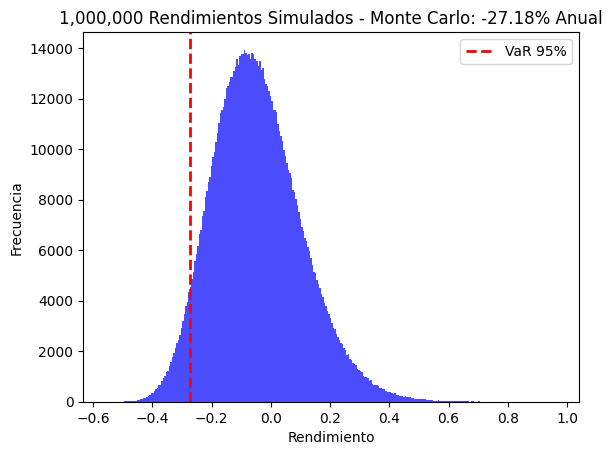

In [60]:
# histograma de los rendimientos simulados
plt.hist(simulated_returns, bins=300, alpha=0.7, color='blue')
plt.title(f'{num_simulations:,} Rendimientos Simulados - Monte Carlo: {var_monte_carlo:.2%} Anual')
plt.xlabel('Rendimiento')
plt.ylabel('Frecuencia')
plt.axvline(var_monte_carlo, color='red', linestyle='dashed', linewidth=2, label='VaR 95%')
plt.legend()
# guardar y mostrar el gráfico
plt.savefig(r'images/monte_carlo_var_distribution.png')
plt.show()

### Monte Carlo con Cholesky - Cartera

In [63]:

import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos
np.random.seed(42)
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25]) 

# Parámetros de los activos
S0 = np.array([100, 150, 200, 250])  
mu = returns_df.mean() * 252  
sigma = returns_df.std() * np.sqrt(252)

# Matriz de correlación y descomposición de Cholesky
correlation_matrix = returns_df.corr()
L = np.linalg.cholesky(correlation_matrix)

# Simulación de Monte Carlo con Cholesky
num_simulations = 100_000
time_horizon = 1  # 1 año
simulated_portfolio_returns = []   
for i in range(num_simulations):
    Z_independent = np.random.normal(size=num_assets)
    # Correlacionar los shocks
    Z_correlated = L @ Z_independent  
    S1 = S0 * np.exp((mu - 0.5 * sigma**2) * time_horizon + sigma * np.sqrt(time_horizon) * Z_correlated)   
    portfolio_return = np.dot(weights, (S1 - S0) / S0)
    simulated_portfolio_returns.append(portfolio_return)
simulated_portfolio_returns = np.array(simulated_portfolio_returns)     

# Parámetros del VaR
confidence_level = 0.95 

# Calcular el VaR mediante simulación de Monte Carlo para la cartera (anualizado)
var_monte_carlo_portfolio = np.percentile(simulated_portfolio_returns, (1 - confidence_level) * 100)
print(f'🎲 VaR Monte Carlo anualizado de la cartera (95%): {var_monte_carlo_portfolio:.2%}')

🎲 VaR Monte Carlo anualizado de la cartera (95%): -5.50%


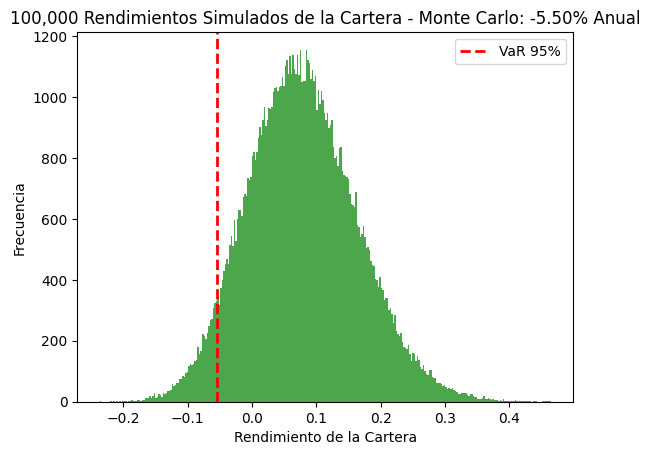

In [64]:
# histograma de los rendimientos simulados de la cartera
plt.hist(simulated_portfolio_returns, bins=300, alpha=0.7, color='green')
plt.title(f'{num_simulations:,} Rendimientos Simulados de la Cartera - Monte Carlo: {var_monte_carlo_portfolio:.2%} Anual')
plt.xlabel('Rendimiento de la Cartera')
plt.ylabel('Frecuencia')        
plt.axvline(var_monte_carlo_portfolio, color='red', linestyle='dashed', linewidth=2, label='VaR 95%')
plt.legend()
# guardar y mostrar el gráfico
plt.savefig(r'images/monte_carlo_portfolio_var_distribution.png')
plt.show()

## Tracking Error

### Tracking Error Ex-post

In [ ]:
import numpy as np  
import pandas as pd

# Simular rendimientos de 4 activos y su benchmark
np.random.seed(42)
days = 252 * 3
num_assets = 4  
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])  
benchmark_returns = np.random.normal(0, 0.008, days)  # Rendimientos del benchmark
benchmark_returns_series = pd.Series(benchmark_returns)

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Paso 1: Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights) 

# Paso 2: Calcular las diferencias de rendimiento (R_p - R_b)
return_differences = portfolio_returns - benchmark_returns_series   

# Paso 3: Calcular la desviación estándar de las diferencias
tracking_error_daily = return_differences.std()

# Paso 4: Anualizar el Tracking Error (multiplicar por √252)
tracking_error_expost_portfolio = tracking_error_daily * np.sqrt(252)
print(f'📏 Tracking Error Ex-post (anualizado): {tracking_error_expost_portfolio:.2%}')

📏 Tracking Error Ex-post (anualizado): 15.07%


### Tracking Error Ex-ante

In [ ]:
import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos
np.random.seed(42)
days = 252 * 3
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])

# Simular pesos del benchmark (índice de referencia)
benchmark_weights = np.array([0.30, 0.30, 0.25, 0.15])

# Pesos de la cartera activa
portfolio_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular el vector de diferencias de pesos activos (Active Weights)
active_weights = portfolio_weights - benchmark_weights

# Calcular la matriz de covarianza de los activos
cov_matrix = returns_df.cov()

# Calcular el Tracking Error Ex-ante
tracking_error_exante = np.sqrt(np.dot(active_weights.T, np.dot(cov_matrix.values, active_weights)))

# Anualizar el Tracking Error (multiplicar por √252 para datos diarios)
tracking_error_exante_annualized = tracking_error_exante * np.sqrt(252)

print(f'📏 Tracking Error Ex-ante (anualizado): {tracking_error_exante_annualized:.2%}')

📏 Tracking Error Ex-ante (anualizado): 1.93%


## Beta de Mercado

### Beta - Activo Individual

In [73]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Simular rendimientos de un activo financiero y del mercado
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
asset_returns = np.random.normal(0, 0.01, days)  # Rendimientos del activo
market_returns = np.random.normal(0, 0.008, days)  # Rendimientos del mercado
asset_returns_series = pd.Series(asset_returns)
market_returns_series = pd.Series(market_returns)

# Calcular el beta mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(market_returns_series, asset_returns_series)
beta = slope
print(f'🎯 Beta del activo: {beta:.4f}')

🎯 Beta del activo: 0.0042


### Beta - Cartera Multi-Activo

In [74]:
import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos y del mercado
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])
market_returns = np.random.normal(0, 0.008, days)  # Rendimientos del mercado
market_returns_series = pd.Series(market_returns)

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights)

# Calcular el beta de la cartera mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(market_returns_series, portfolio_returns)
beta_portfolio = slope
print(f'🃈 Beta de la cartera: {beta_portfolio:.4f}')

🃈 Beta de la cartera: 0.0033


## Ratio de Sharpe

### Sharpe - Activo Individual

In [86]:
import numpy as np
import pandas as pd

# Simular rendimientos de un activo financiero
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
returns = np.random.normal(0, 0.01, days)  # Rendimientos
returns_series = pd.Series(returns)

# Parámetros del Ratio de Sharpe
risk_free_rate = 0.01 # Tasa libre de riesgo anualizada    

# Calcular el exceso de retorno anualizado
excess_return = returns_series.mean() * 252 - risk_free_rate

# Calcular la volatilidad anualizada
volatility = returns_series.std() * np.sqrt(252)

# Calcular el Ratio de Sharpe
sharpe_ratio = excess_return / volatility
print(f'📈 Ratio de Sharpe: {sharpe_ratio:.4f}')

📈 Ratio de Sharpe: -0.3596


### Sharpe - Cartera

In [85]:
import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos
np.random.seed(42)
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])  

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights)

# Parámetros del Ratio de Sharpe
risk_free_rate = 0.00  # Tasa libre de riesgo anualizada    

# Calcular el exceso de retorno anualizado de la cartera
excess_return_portfolio = portfolio_returns.mean() * 252 - risk_free_rate

# Calcular la volatilidad anualizada de la cartera
cov_matrix = returns_df.cov()
volatility_portfolio = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights))) * np.sqrt(252)

# Calcular el Ratio de Sharpe de la cartera
sharpe_ratio_portfolio = excess_return_portfolio / volatility_portfolio
print(f'📈 Ratio de Sharpe de la cartera: {sharpe_ratio_portfolio:.4f}')

📈 Ratio de Sharpe de la cartera: 0.9530


## Ratio de Sortino

### Sortino - Activo Individual

In [87]:
import numpy as np
import pandas as pd

# Simular rendimientos de un activo financiero
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
returns = np.random.normal(0, 0.01, days)  # Rendimientos
returns_series = pd.Series(returns)

# Parámetros del Ratio de Sortino
risk_free_rate = 0.01  # Tasa libre de riesgo anualizada    

# Calcular el exceso de retorno anualizado
excess_return = returns_series.mean() * 252 - risk_free_rate

# Calcular la desviación estándar de los rendimientos negativos
downside_returns = returns_series[returns_series < 0]
downside_deviation = downside_returns.std() * np.sqrt(252)

# Calcular el Ratio de Sortino
sortino_ratio = excess_return / downside_deviation
print(f'📈 Ratio de Sortino: {sortino_ratio:.4f}')

📈 Ratio de Sortino: -0.6203


### Sortino - Cartera

In [89]:
import numpy as np
import pandas as pd

# Simular rendimientos de 4 activos
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])  

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights)

# Parámetros del Ratio de Sortino
risk_free_rate = 0.01  # Tasa libre de riesgo anualizada    

# Calcular el exceso de retorno anualizado de la cartera
excess_return_portfolio = portfolio_returns.mean() * 252 - risk_free_rate

# Calcular la desviación estándar de los rendimientos negativos de la cartera

downside_returns_portfolio = portfolio_returns[portfolio_returns < 0]
downside_deviation_portfolio = downside_returns_portfolio.std() * np.sqrt(252)  

# Calcular el Ratio de Sortino de la cartera
sortino_ratio_portfolio = excess_return_portfolio / downside_deviation_portfolio
print(f'📈 Ratio de Sortino de la cartera: {sortino_ratio_portfolio:.4f}')

📈 Ratio de Sortino de la cartera: -2.4403


## Ratio de Treynor

### Treynor - Activo Individual

In [90]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Simular rendimientos de un activo financiero y del mercado
np.random.seed(42)
days = 252 * 3  # 3 años de datos diarios
asset_returns = np.random.normal(0, 0.01, days)  # Rendimientos del activo
market_returns = np.random.normal(0, 0.008, days)  # Rendimientos del mercado
asset_returns_series = pd.Series(asset_returns)
market_returns_series = pd.Series(market_returns)

# Calcular el beta mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(market_returns_series, asset_returns_series)
beta = slope    

# Parámetros del Ratio de Treynor
risk_free_rate = 0.01  # Tasa libre de riesgo anualizada    

# Calcular el exceso de retorno anualizado
excess_return = asset_returns_series.mean() * 252 - risk_free_rate

# Calcular el Ratio de Treynor
treynor_ratio = excess_return / beta
print(f'📈 Ratio de Treynor: {treynor_ratio:.4f}')

📈 Ratio de Treynor: -13.3893


### Treynor - Cartera

In [91]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Simular rendimientos de 4 activos y del mercado
np.random.seed(42)
num_assets = 4
returns_matrix = np.random.normal(0, 0.01, (days, num_assets))
returns_df = pd.DataFrame(returns_matrix, columns=[f'Asset_{i+1}' for i in range(num_assets)])
market_returns = np.random.normal(0, 0.008, days)  # Rendimientos del mercado
market_returns_series = pd.Series(market_returns)

# Pesos de la cartera
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular los rendimientos de la cartera
portfolio_returns = returns_df.dot(weights)

# Calcular el beta de la cartera mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(market_returns_series, portfolio_returns)
beta_portfolio = slope  

# Parámetros del Ratio de Treynor
risk_free_rate = 0.01  # Tasa libre de riesgo anualizada

# Calcular el exceso de retorno anualizado de la cartera
excess_return_portfolio = portfolio_returns.mean() * 252 - risk_free_rate   

# Calcular el Ratio de Treynor de la cartera
treynor_ratio_portfolio = excess_return_portfolio / beta_portfolio
print(f'📈 Ratio de Treynor de la cartera: {treynor_ratio_portfolio:.4f}')

📈 Ratio de Treynor de la cartera: 3.3323
